# 機器學習理論與實作 練習二

## Classification 實作

### Load data

In [4]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

# 腫瘤資料

In [5]:
data = datasets.load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Format data

In [6]:
cancer = pd.DataFrame(data["data"], columns=data["feature_names"])
cancer["target"] = data["target"]
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


### Visualize 視覺化

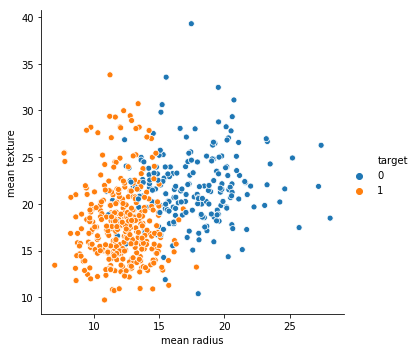

In [5]:
sns.relplot(x="mean radius", y="mean texture", hue="target", data=cancer) # 觀察半徑與質地的重疊性

C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in r

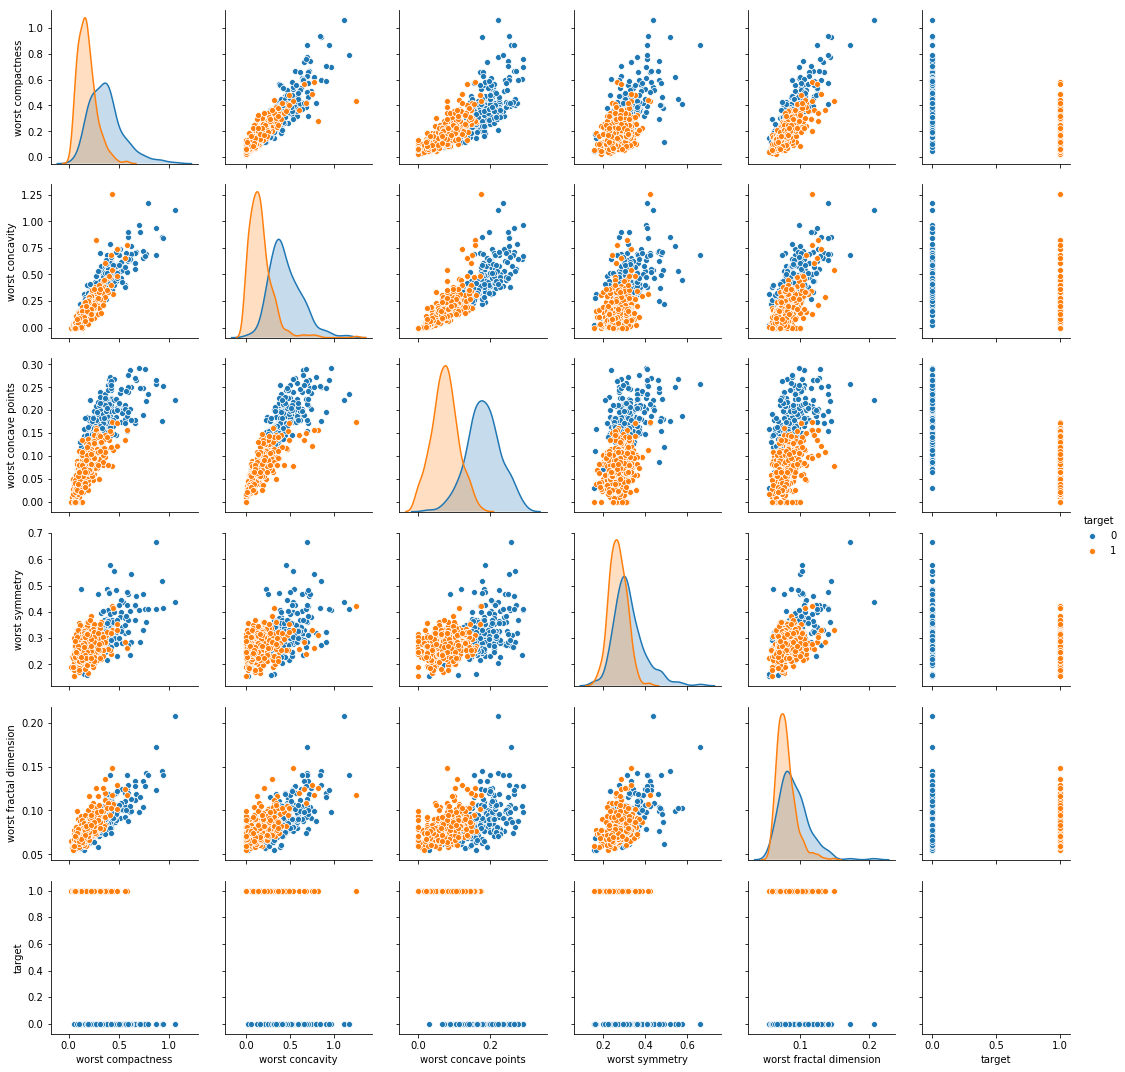

In [6]:
sns.pairplot(hue="target", data=cancer.iloc[:, 25:])

### Training

In [7]:
from sklearn.svm import SVC, LinearSVC

In [8]:
X = cancer.iloc[:, 0:29].values
y = cancer["target"].values

In [9]:
model = LinearSVC(random_state=555)  

# LinearSVC : 線性支持向量分類
# random_state : 確保每次的模型跑出來都一樣 , 數字是老師隨機給的 , 不代表任何意思 , 這個參數可有可無

## 補充

SVM = Support Vector Machine          支持向量機

SVC = Support Vector Classification   支持向量機用於分類

SVR = Support Vector Regression       支持向量機用於回歸分析

## random_state 有無設定的差異

In [29]:
for i in range(10):
    model = LinearSVC(random_state=555)  
    model.fit(X=X, y=y)
    print(model.score(X=X, y=y))

0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475
0.9332161687170475


In [28]:
for i in range(10):
    model = LinearSVC(random_state=None)  
    model.fit(X=X, y=y)
    print(model.score(X=X, y=y))

0.9332161687170475
0.9314586994727593
0.9173989455184535
0.9332161687170475
0.9314586994727593
0.9138840070298769
0.9156414762741653
0.9138840070298769
0.9314586994727593
0.9226713532513181


In [10]:
model.fit(X=X, y=y)   # 注意 X y 的大小寫

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

C=1.0表示容許noise  

class_weight設定權重  

loss='squared_hinge' error取平方 

max_iter=1000 最多跑1000次 

tol=0.0001 loss小於時就收斂，兩個條件其中一滿足 

multi_class='ovr'一對多

### Mean accuracy

In [11]:
model.score(X=X, y=y)

0.9332161687170475

### Prediction

In [12]:
predict_y = model.predict(X=X)

### Confusion matrix

In [13]:
from sklearn import metrics

In [14]:
confmat = metrics.confusion_matrix(y, predict_y) # 標準答案與預測值比較
confmat

array([[185,  27],
       [ 11, 346]], dtype=int64)

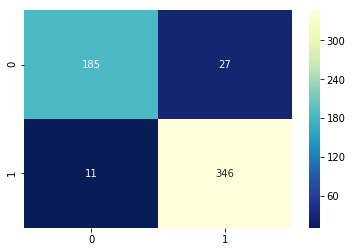

In [15]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

# cmap = matplotlib色彩映射名稱或對象，或顏色列表，可選
# annot = 繪製有色數據時將色彩映射居中的值。cmap如果未指定，則使用此參數將更改默認值。
# fmt = 添加註釋時要使用的字符串格式代碼。

# [seaborn.heatmap說明](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# Classification report

In [16]:
report = metrics.classification_report(y, predict_y)
print(report)

             precision    recall  f1-score   support

          0       0.94      0.87      0.91       212
          1       0.93      0.97      0.95       357

avg / total       0.93      0.93      0.93       569



### Accuracy 準確度 , precision 精準度  and recall 召回率   ，補充 F1 Score

In [14]:
metrics.accuracy_score(y, predict_y)     # Accuracy 正確預測有病跟沒病的比例

0.9332161687170475

In [15]:
metrics.precision_score(y, predict_y)    # precision 預測有病，真的有病的比例

0.9276139410187667

In [16]:
metrics.recall_score(y, predict_y)       # recall 真的病人，被預測出來的比例

0.969187675070028

In [17]:
metrics.f1_score(y, predict_y)           # precision 與 recall 的綜合指標

0.947945205479452

<img src="http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.003.jpeg" width="60%">

上述指標沒有所謂的最好，各有其限制，要同時改善也幾乎不太可能，故端看ML的應用與目的來決定需要符合哪幾種指標。

### SVM模型有两个非常重要的参数C与gamma。其中 C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差

### gamma是选择RBF函数作为kernel后，该函数自带的一个参数。隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度。

### Training SVC with different kernel

In [19]:
model1 = SVC(kernel="linear", probability=True, random_state=555)
model2 = SVC(probability=True, random_state=555)

<font size=6>補充 kernel ： </font>

string，optional（default ='rbf'）
指定要在算法中使用的內核類型。
它必須是<font color='red'>'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'或者callable之一</font>。
如果沒有給出，將使用'rbf'。
如果給出可調用，則它用於從數據矩陣預先計算內核矩陣; 
該矩陣應該是一個形狀的數組。(n_samples, n_samples)

'linear' 線性

'poly'   多項式

'rbf'    高斯核，理論上 SVM 用高斯核可以擬合任何非線性數據 

In [20]:
model1.fit(X=X, y=y)
model2.fit(X=X, y=y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=555, shrinking=True,
  tol=0.001, verbose=False)

SVC可以選kernel  degree幾次方  

In [21]:
score_y1 = model1.decision_function(X)
score_y2 = model2.decision_function(X)

# FPR, TPR   
## 假陽性率  (False Positive Rate，FPR)
## 真陽性率  (True Positive Rate，TPR)

In [22]:
n_classes = 2

In [23]:
linear_svc = pd.DataFrame()
rbf_svc = pd.DataFrame()
for i in range(n_classes):
    fpr = "fpr_cls_{}".format(i)
    tpr = "tpr_cls_{}".format(i)
    linear_svc[fpr], linear_svc[tpr], _ = metrics.roc_curve(y, score_y1)
    fpr = "fpr_cls_{}".format(i)
    tpr = "tpr_cls_{}".format(i)
    rbf_svc[fpr], rbf_svc[tpr], _ = metrics.roc_curve(y, score_y2)

In [24]:
linear_svc.head()

,fpr_cls_0,tpr_cls_0,fpr_cls_1,tpr_cls_1
0,0.000000,0.002801,0.000000,0.002801
1,0.000000,0.537815,0.000000,0.537815
2,0.004717,0.537815,0.004717,0.537815
3,0.004717,0.918768,0.004717,0.918768
4,0.009434,0.918768,0.009434,0.918768


In [25]:
rbf_svc.head()

,fpr_cls_0,tpr_cls_0,fpr_cls_1,tpr_cls_1
0,0.000000,0.002801,0.000000,0.002801
1,0.000000,1.000000,0.000000,1.000000
2,0.103774,1.000000,0.103774,1.000000
3,0.683962,1.000000,0.683962,1.000000
4,0.698113,1.000000,0.698113,1.000000


### ROC curve

接收者操作特徵曲線（receiver operating characteristic curve，或者叫ROC曲線）

是一種坐標圖式的分析工具，用於 (1) 選擇最佳的信號偵測模型、捨棄次佳的模型。 (2) 在同一模型中設定最佳閾值。

C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


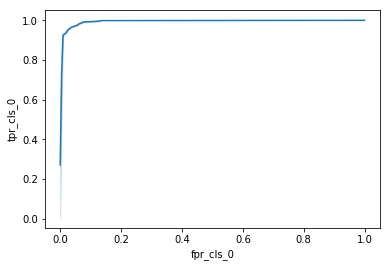

In [26]:
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=linear_svc)

## ROC曲線下方的面積（英語：Area under the Curve of ROC (AUC ROC)）

![AUC](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Curvas.png/350px-Curvas.png)

AUC = 1，是完美分類器，採用這個預測模型時，存在至少一個閾值能得出完美預測。絕大多數預測的場合，不存在完美分類器。

0.5 < AUC < 1，優於隨機猜測。這個分類器（模型）妥善設定閾值的話，能有預測價值。

AUC = 0.5，跟隨機猜測一樣（例：丟銅板），模型沒有預測價值。

AUC < 0.5，比隨機猜測還差；但只要總是反預測而行，就優於隨機猜測。

In [27]:
metrics.auc(linear_svc["fpr_cls_0"], linear_svc["tpr_cls_0"])

0.9947941440727235

C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


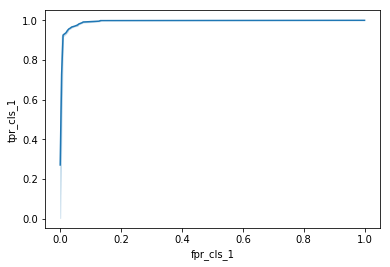

In [28]:
sns.lineplot(x="fpr_cls_1", y="tpr_cls_1", data=linear_svc)

In [29]:
metrics.auc(linear_svc["fpr_cls_1"], linear_svc["tpr_cls_1"]) # 只有兩類，所以值同上

0.9947941440727235

C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


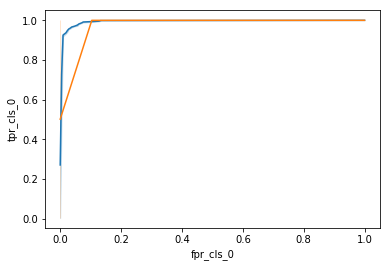

In [30]:
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=linear_svc)
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=rbf_svc)  # 表現比藍線差 overfitting

# It's your turn!

In [ ]:
data = datasets.load_iris()